In [1]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./mcdonalds.csv")
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [3]:
df.shape

(1453, 15)

In [4]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [5]:
MD_x = df.iloc[:, 0:11]
MD_x = (MD_x == "Yes").astype(int)
column_means = np.round(MD_x.mean(axis=0), 2)
column_means

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [6]:
from sklearn.decomposition import PCA

pca = PCA()
MD_pca = pca.fit_transform(MD_x)

print("Standard Deviation (Sdev) of Principal Components:")
print(np.sqrt(pca.explained_variance_))
print("\nProportion of Variance (Prop.Variance) of Principal Components:")
print(pca.explained_variance_ratio_)
print("\nCumulative Proportion (Cum.Prop) of Principal Components:")
print(np.cumsum(pca.explained_variance_ratio_))
print("\nRotation (Rotation) of Principal Components:")
print(pca.components_)

Standard Deviation (Sdev) of Principal Components:
[0.75704952 0.60745556 0.50461946 0.39879859 0.33740501 0.31027461
 0.28969732 0.27512196 0.2652511  0.24884182 0.23690284]

Proportion of Variance (Prop.Variance) of Principal Components:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]

Cumulative Proportion (Cum.Prop) of Principal Components:
[0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]

Rotation (Rotation) of Principal Components:
[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.0885713

In [7]:
MD_pca

array([[ 0.42536706, -0.21907878,  0.6632553 , ...,  0.18100693,
         0.51570617, -0.56707389],
       [-0.21863768,  0.38818996, -0.73082668, ...,  0.11147641,
         0.49331285, -0.50044033],
       [ 0.37541475,  0.73043507, -0.12203978, ..., -0.32228786,
         0.06175857,  0.24274108],
       ...,
       [-0.18589445,  1.06266156,  0.22085675, ...,  0.03825472,
         0.05651822, -0.01279977],
       [-1.18206441, -0.03856977,  0.56156066, ...,  0.02226748,
        -0.00257265, -0.10531631],
       [ 1.55024186,  0.27503101, -0.01373727, ..., -0.13658866,
        -0.43279782, -0.45607556]])

In [8]:
num_digits = 1

np.set_printoptions(precision=num_digits, suppress=True)
print(MD_pca)

[[ 0.4 -0.2  0.7 ...  0.2  0.5 -0.6]
 [-0.2  0.4 -0.7 ...  0.1  0.5 -0.5]
 [ 0.4  0.7 -0.1 ... -0.3  0.1  0.2]
 ...
 [-0.2  1.1  0.2 ...  0.   0.1 -0. ]
 [-1.2 -0.   0.6 ...  0.  -0.  -0.1]
 [ 1.6  0.3 -0.  ... -0.1 -0.4 -0.5]]


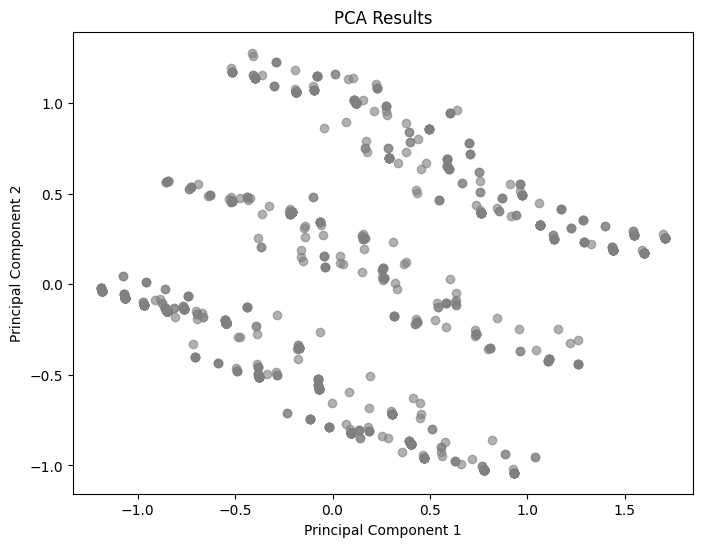

In [9]:
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

pca = PCA()
MD_pca = pca.fit_transform(MD_x)

plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
plt.show()


In [10]:
# Here we will perform K-means clustering as defined in step 4 and 5 of the Market Segmentation Analysis

from sklearn.cluster import KMeans

# Set seed for reproducibility
np.random.seed(1234)

cluster_results = []
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    labels = kmeans.fit_predict(MD_x)
    cluster_results.append(labels)

def relabel_clusters(labels):
    unique_labels = np.unique(labels)
    relabeled = np.zeros_like(labels)
    for i, label in enumerate(unique_labels):
        relabeled[labels == label] = i
    return relabeled

# Relabel each set of cluster results
relabel_cluster_results = [relabel_clusters(labels) for labels in cluster_results]

for idx, labels in enumerate(relabel_cluster_results):
    print(f"Number of Clusters: {idx + 2}")
    print(labels)
    print("-" * 30)

Number of Clusters: 2
[1 0 0 ... 0 0 1]
------------------------------
Number of Clusters: 3
[2 1 1 ... 1 0 2]
------------------------------
Number of Clusters: 4
[0 3 3 ... 3 2 1]
------------------------------
Number of Clusters: 5
[4 1 2 ... 2 3 0]
------------------------------
Number of Clusters: 6
[5 2 0 ... 0 1 3]
------------------------------
Number of Clusters: 7
[4 0 3 ... 3 6 1]
------------------------------
Number of Clusters: 8
[1 0 0 ... 5 2 3]
------------------------------


In [11]:
from sklearn.mixture import GaussianMixture

np.random.seed(1234)
bic_scores = []
cluster_results = []
for n_components in range(2, 9):
    gmm = GaussianMixture(n_components=n_components, n_init=10, random_state=1234)
    gmm.fit(MD_x)
    bic_scores.append(gmm.bic(MD_x))
    labels = gmm.predict(MD_x)
    cluster_results.append(labels)

# Find the optimal number of components based on BIC
optimal_components = np.argmin(bic_scores) + 2  # Adding 2 because the loop starts from 2

print("Optimal Number of Components:", optimal_components)

optimal_cluster_labels = cluster_results[optimal_components - 2]  # Subtracting 2 because the loop starts from 2
print("Cluster Labels:")
print(optimal_cluster_labels)


Optimal Number of Components: 7
Cluster Labels:
[6 6 2 ... 6 3 4]
